In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-ev-sales-2010-2024/IEA Global EV Data 2024.csv


In [2]:
evsales = pd.read_csv('/kaggle/input/global-ev-sales-2010-2024/IEA Global EV Data 2024.csv', index_col = 0)
evsales.head()

,category,parameter,mode,powertrain,year,unit,value
region,,,,,,,
Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [3]:
evsales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12654 entries, Australia to World
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   category    12654 non-null  object 
 1   parameter   12654 non-null  object 
 2   mode        12654 non-null  object 
 3   powertrain  12654 non-null  object 
 4   year        12654 non-null  int64  
 5   unit        12654 non-null  object 
 6   value       12654 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 790.9+ KB


In [4]:
evsales.shape

(12654, 7)

In [5]:
evsales['year'].unique()

array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023, 2010, 2025, 2030, 2035])

In [6]:
evsales.reset_index(inplace = True)
evsales.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


In [7]:
evsales['region'].unique()

array(['Australia', 'Austria', 'Belgium', 'Brazil', 'Bulgaria', 'Canada',
       'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Estonia', 'EU27', 'Europe',
       'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Korea', 'Latvia', 'Lithuania', 'Luxembourg', 'Mexico',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Rest of the world', 'Romania', 'Seychelles', 'Slovakia',
       'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland',
       'Thailand', 'Turkiye', 'United Arab Emirates', 'United Kingdom',
       'USA', 'World'], dtype=object)

In [8]:
vehicles = evsales.loc[evsales['unit'] == 'Vehicles']
vehicles.head()

,region,category,parameter,mode,powertrain,year,unit,value
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.0
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.0
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.0
5,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170.0
8,Australia,Historical,EV stock,Cars,PHEV,2012,Vehicles,80.0


In [9]:
display(vehicles.shape)
display(vehicles.describe())

(6842, 8)

,year,value
count,6842.000000,6.842000e+03
mean,2019.883221,7.503803e+05
std,5.352174,9.307153e+06
min,2010.000000,1.000000e-03
25%,2016.000000,6.725000e+01
50%,2020.000000,1.200000e+03
75%,2022.000000,2.200000e+04
max,2035.000000,4.400000e+08


In [10]:
modes = vehicles['mode'].value_counts()
modes

mode
Cars      2975
Buses     1485
Vans      1449
Trucks     933
Name: count, dtype: int64

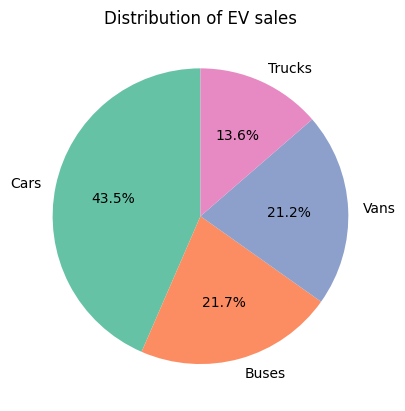

In [11]:
fig, ax = plt.subplots()
ax.pie(modes, labels = modes.index, startangle = 90, autopct='%0.1f%%', colors = plt.cm.Set2.colors)
ax.set_title('Distribution of EV sales');

In [12]:
min_row = vehicles.loc[vehicles['value'].idxmin()]
min_row

region            Israel
category      Historical
parameter       EV sales
mode               Buses
powertrain           BEV
year                2013
unit            Vehicles
value              0.001
Name: 6151, dtype: object

In [13]:
max_row = vehicles.loc[vehicles['value'].idxmax()]
max_row

region                 World
category      Projection-APS
parameter           EV stock
mode                    Cars
powertrain               BEV
year                    2035
unit                Vehicles
value            440000000.0
Name: 12609, dtype: object

In [14]:
vehicles_by_countries = pd.DataFrame(vehicles.groupby(vehicles['region'])['value'].sum())
vehicles_by_countries.reset_index(inplace = True)
vehicles_by_countries.head(10)

,region,value
0,Australia,5.788320e+05
1,Austria,8.719660e+05
2,Belgium,1.687010e+06
3,Brazil,2.649470e+05
4,Bulgaria,4.623000e+03
5,Canada,2.416440e+06
6,Chile,1.445800e+04
7,China,1.148052e+09
8,Colombia,1.602300e+04
9,Costa Rica,2.763100e+04


In [15]:
vehicles_by_countries.columns = ['region', 'total_value']
vehicles_by_countries = vehicles_by_countries[vehicles_by_countries['region'] != 'World']
vehicles_by_countries

,region,total_value
0,Australia,5.788320e+05
1,Austria,8.719660e+05
2,Belgium,1.687010e+06
3,Brazil,2.649470e+05
4,Bulgaria,4.623000e+03
5,Canada,2.416440e+06
6,Chile,1.445800e+04
7,China,1.148052e+09
8,Colombia,1.602300e+04
9,Costa Rica,2.763100e+04


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


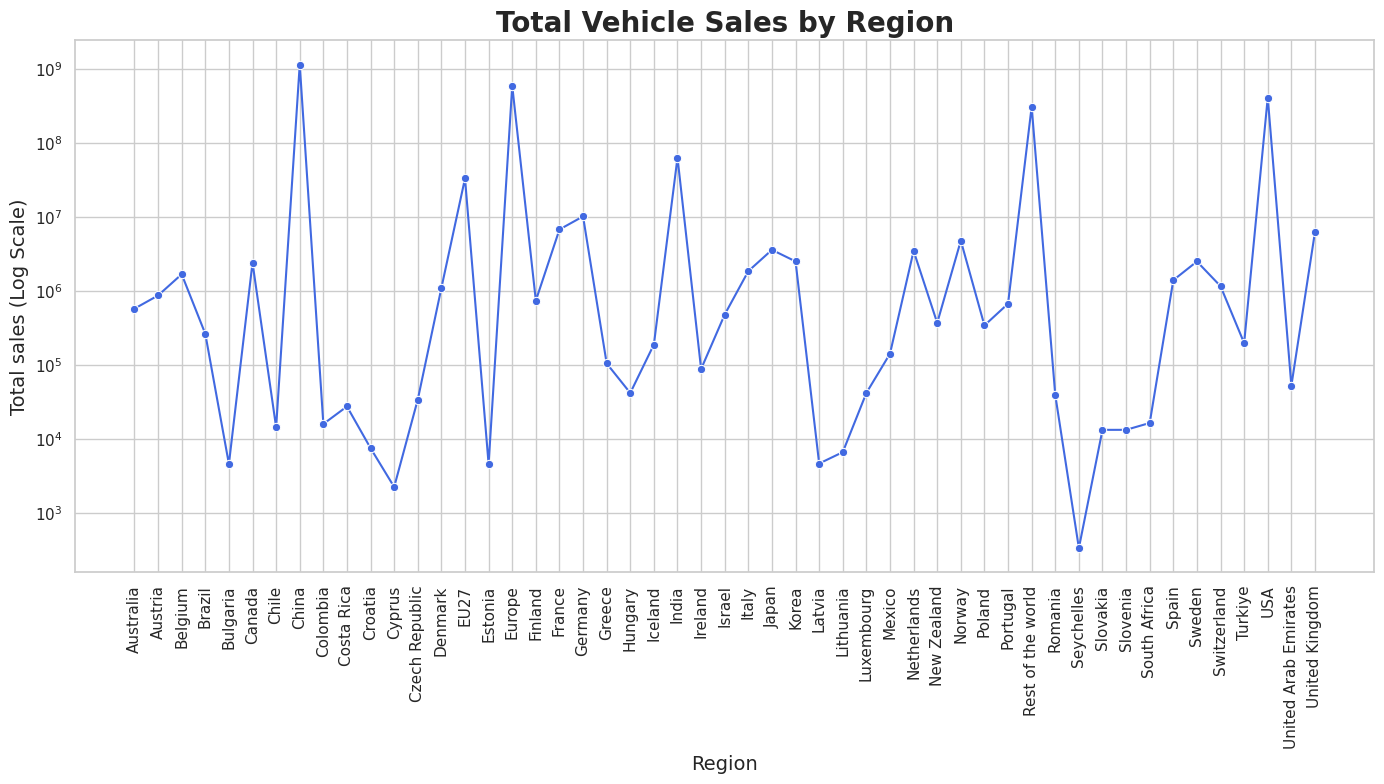

In [16]:
sns.set(style = 'whitegrid')
fig, ax = plt.subplots(figsize = (14, 8))
sns.lineplot(x = vehicles_by_countries['region'], y = vehicles_by_countries['total_value'], marker = 'o', color = 'royalblue')
plt.xticks(rotation = 90)
ax.set_title('Total Vehicle Sales by Region', fontsize=20, fontweight='bold')
ax.set_xlabel('Region', fontsize = 14)
ax.set_ylabel('Total sales (Log Scale)', fontsize = 14)
plt.yscale('log')
plt.tight_layout();

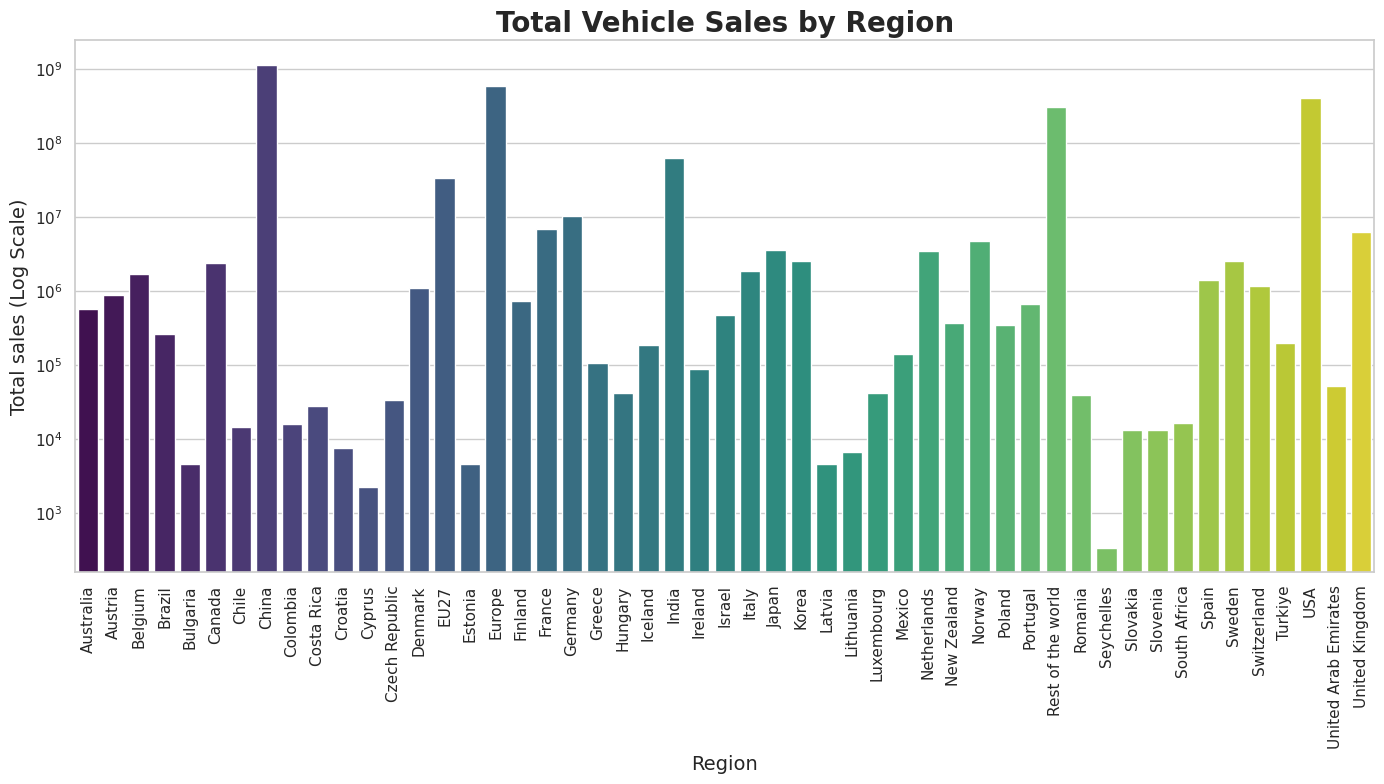

In [17]:
sns.set(style = 'whitegrid')
fig, ax = plt.subplots(figsize = (14, 8))
sns.barplot(x = vehicles_by_countries['region'], y = vehicles_by_countries['total_value'], palette = 'viridis')
plt.xticks(rotation = 90)
ax.set_title('Total Vehicle Sales by Region', fontsize=20, fontweight='bold')
ax.set_xlabel('Region', fontsize = 14)
ax.set_ylabel('Total sales (Log Scale)', fontsize = 14)
plt.yscale('log')
plt.tight_layout();

In [18]:
vehicles_by_countries_2 = pd.DataFrame(vehicles[vehicles['region'] != 'World'].groupby(vehicles['region'])['value'].sum().sort_values())
vehicles_by_countries_2.reset_index(inplace = True)
vehicles_by_countries_2

,region,value
0,Seychelles,3.380000e+02
1,Cyprus,2.260000e+03
2,Estonia,4.585000e+03
3,Bulgaria,4.623000e+03
4,Latvia,4.687000e+03
5,Lithuania,6.673000e+03
6,Croatia,7.557000e+03
7,Slovakia,1.335100e+04
8,Slovenia,1.336300e+04
9,Chile,1.445800e+04


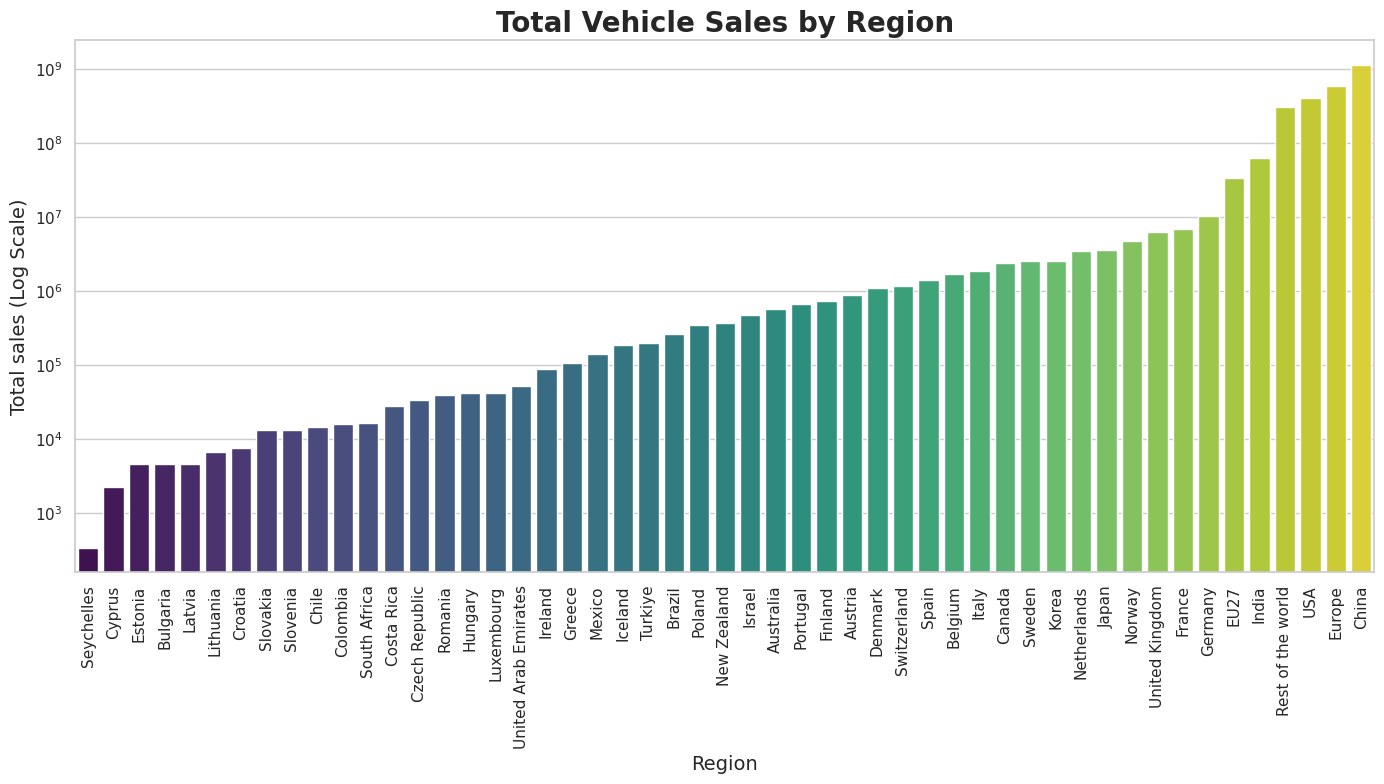

In [19]:
sns.set(style = 'whitegrid')
fig, ax = plt.subplots(figsize = (14, 8))
sns.barplot(x = vehicles_by_countries_2['region'], y = vehicles_by_countries_2['value'].sort_values(), palette = 'viridis')
plt.xticks(rotation = 90)
ax.set_title('Total Vehicle Sales by Region', fontsize=20, fontweight='bold')
ax.set_xlabel('Region', fontsize = 14)
ax.set_ylabel('Total sales (Log Scale)', fontsize = 14)
plt.yscale('log')
plt.tight_layout();

In [20]:
bottom_10_countries = vehicles_by_countries_2.head(10)
bottom_10_countries

,region,value
0,Seychelles,338.0
1,Cyprus,2260.0
2,Estonia,4585.0
3,Bulgaria,4623.0
4,Latvia,4687.0
5,Lithuania,6673.0
6,Croatia,7557.0
7,Slovakia,13351.0
8,Slovenia,13363.0
9,Chile,14458.0


In [21]:
top_10_countries = vehicles_by_countries.nlargest(10, 'total_value')
top_10_countries

,region,total_value
7,China,1.148052e+09
16,Europe,5.937754e+08
48,USA,4.112801e+08
38,Rest of the world,3.089968e+08
23,India,6.341878e+07
14,EU27,3.324256e+07
19,Germany,1.020111e+07
18,France,6.787772e+06
50,United Kingdom,6.283637e+06
35,Norway,4.793634e+06


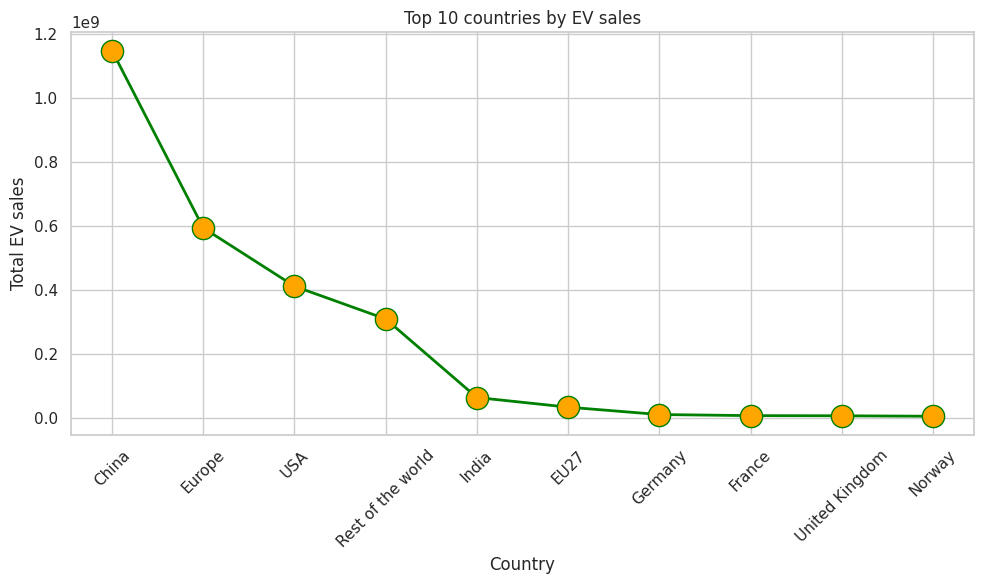

In [22]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.set_theme(style = 'whitegrid')
ax.plot(top_10_countries['region'], top_10_countries['total_value'], 
        marker = 'o', color = 'green', markerfacecolor = 'orange', 
        linestyle = '-', linewidth = 2, markersize = 16)
ax.set_xlabel('Country')
ax.set_ylabel('Total EV sales')

ax.set_title('Top 10 countries by EV sales')
plt.xticks(rotation = 45)

plt.tight_layout();

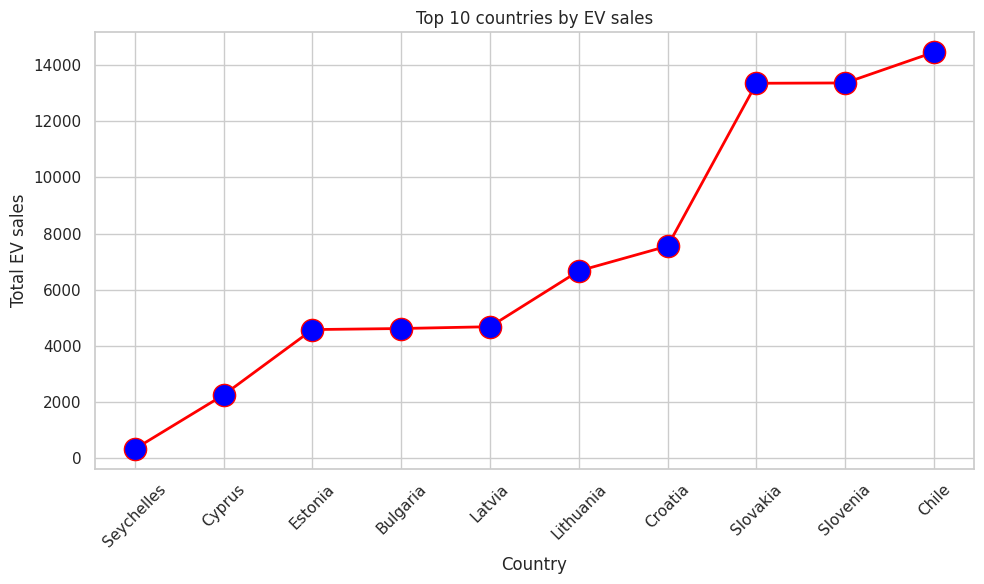

In [23]:
fig, ax = plt.subplots(figsize = (10, 6))
sns.set_theme(style = 'whitegrid')
ax.plot(bottom_10_countries['region'], bottom_10_countries['value'], 
        marker = 'o', color = 'red', markerfacecolor = 'blue', 
        linestyle = '-', linewidth = 2, markersize = 16)
ax.set_xlabel('Country')
ax.set_ylabel('Total EV sales')

ax.set_title('Top 10 countries by EV sales')
plt.xticks(rotation = 45)

plt.tight_layout();

In [24]:
continent_map = {
    'Australia': 'Oceania', 'Austria': 'Europe', 'Belgium': 'Europe', 'Brazil': 'South America',
    'Bulgaria': 'Europe', 'Canada': 'North America', 'Chile': 'South America', 'China': 'Asia', 
    'Colombia': 'South America', 'Costa Rica': 'North America', 'Croatia': 'Europe', 'Cyprus': 'Europe',
    'Czech Republic': 'Europe', 'Denmark': 'Europe', 'EU27': 'Europe', 'Estonia': 'Europe', 'Europe': 'Europe', 
    'Finland': 'Europe', 'France': 'Europe', 'Germany': 'Europe', 'Greece': 'Europe', 'Hungary': 'Europe',
    'Iceland': 'Europe', 'India': 'Asia', 'Ireland': 'Europe', 'Israel': 'Asia', 'Italy': 'Europe',
    'Japan': 'Asia', 'Korea': 'Asia', 'Latvia': 'Europe', 'Lithuania': 'Europe', 'Luxembourg': 'Europe',
    'Mexico': 'North America', 'Netherlands': 'Europe', 'New Zealand': 'Oceania', 'Norway': 'Europe',
    'Poland': 'Europe', 'Portugal': 'Europe', 'Rest of the world': 'Other', 'Romania': 'Europe', 
    'Seychelles': 'Africa', 'Slovakia': 'Europe', 'Slovenia': 'Europe', 'South Africa': 'Africa', 
    'Spain': 'Europe', 'Sweden': 'Europe', 'Switzerland': 'Europe', 'Turkiye': 'Europe', 'USA': 'North America', 
    'United Arab Emirates': 'Asia', 'United Kingdom': 'Europe'
}

vehicles_by_countries['continent'] = vehicles_by_countries['region'].map(continent_map)
vehicles_by_continent = pd.DataFrame(vehicles_by_countries.groupby('continent')['total_value'].sum().reset_index())

In [25]:
vehicles_by_continent.columns = ['continent', 'total_sales']
vehicles_by_continent

,continent,total_sales
0,Africa,1.687100e+04
1,Asia,1.218126e+09
2,Europe,6.717296e+08
3,North America,4.138668e+08
4,Oceania,9.502940e+05
5,Other,3.089968e+08
6,South America,2.954280e+05


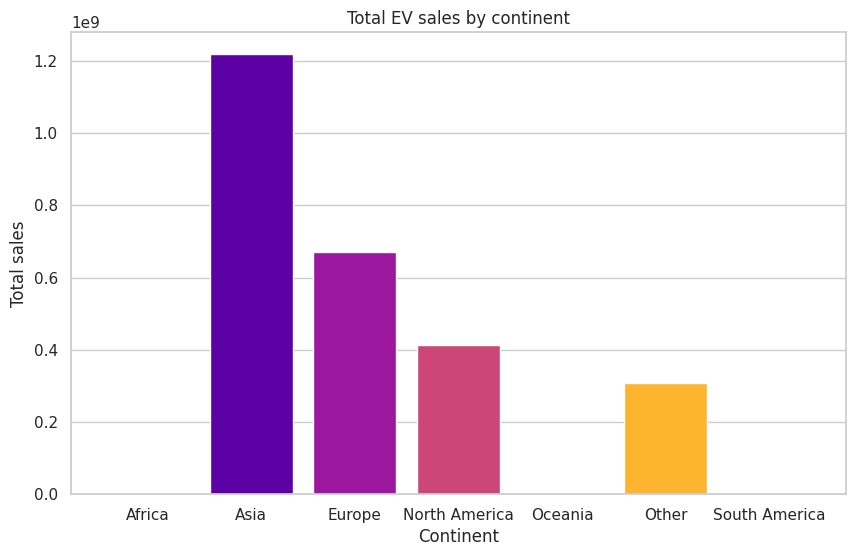

In [26]:
colors = plt.cm.plasma(np.linspace(0, 1, 7))
fig, ax = plt.subplots(figsize = (10, 6))
ax.bar(vehicles_by_continent['continent'], vehicles_by_continent['total_sales'], color = colors)
ax.set_title('Total EV sales by continent')
ax.set_xlabel('Continent')
ax.set_ylabel('Total sales')
plt.grid(axis = 'x');


In [27]:
import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap

map_center = [20, 0]
m = folium.Map(location = map_center, zoom_start = 2)

continent_data = {
    'Africa': {'total_sales': 16871, 'coords': [1.0, 20.0]},
    'Asia': {'total_sales': 1218126365, 'coords': [34.0, 100.0]},
    'Europe': {'total_sales': 671729574, 'coords': [48.0, 10.0]},
    'North America': {'total_sales': 413866762, 'coords': [37.0, -95.0]},
    'Oceania': {'total_sales': 950294, 'coords': [-25.0, 135.0]},
    'South America': {'total_sales': 295428, 'coords': [-15.0, -60.0]},
    'Other': {'total_sales': 2829116800, 'coords': [0.0, 0.0]} 
}

heat_data = []
marker_cluster = MarkerCluster().add_to(m)

for continent, info in continent_data.items():
    folium.Marker(
        location = info['coords'],
        popup = f"{continent} : {info['total_sales']}",
        icon = folium.Icon(color = 'blue' if continent != 'Other' else 'red')
    ).add_to(marker_cluster)

    heat_data.append(info['coords'] + [info['total_sales']])

#print(heat_data)
heatmap = HeatMap(heat_data, name = 'Sales Heatmap', radius = 20).add_to(m)

folium.LayerControl().add_to(m)

m

In [28]:
map_center = [20, 0]
m = folium.Map(location = map_center, zoom_start = 2)

top_5_market_data = {
    'China': {'total_sales': 1.148052e+09, 'coords': [34.0, 110.0]},
    'Europe': {'total_sales': 5.937754e+08, 'coords': [48.0, 10.0]},
    'USA': {'total_sales': 4.112801e+08, 'coords': [37.0, -95.0]},
    'Rest of the world': {'total_sales': 3.089968e+08, 'coords': [0.0, 0.0]},
    'India': {'total_sales': 6.341878e+07, 'coords': [24.0, 78.0]},
}

heat_data = []
marker_cluster = MarkerCluster().add_to(m)

for country, info in top_5_market_data.items():
    folium.Marker(
        location = info['coords'],
        popup = f"{country} : {info['total_sales']}",
        icon = folium.Icon(color = 'blue' if country != 'Rest of the world' else 'red')
    ).add_to(marker_cluster)

    heat_data.append(info['coords'] + [info['total_sales']])

#print(heat_data)
heatmap = HeatMap(heat_data, name = 'Sales Heatmap', radius = 20).add_to(m)

folium.LayerControl().add_to(m)

m

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


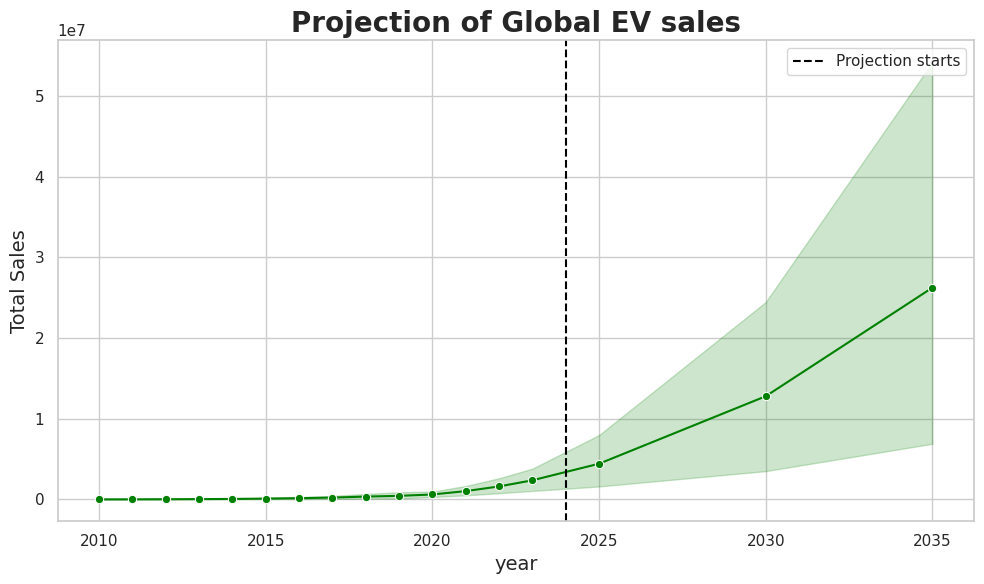

In [29]:
world_data = vehicles[vehicles['region'] == 'World']

sns.set(style= 'whitegrid')

fig, ax = plt.subplots(figsize = (10, 6))

sns.lineplot(data = world_data, x = 'year', y = 'value', marker = 'o', color = 'green')

ax.set_title('Projection of Global EV sales', fontsize = 20, fontweight = 'bold')
ax.set_xlabel('year', fontsize = 14)
ax.set_ylabel('Total Sales', fontsize = 14)

plt.axvline(x = 2024, color = 'black', linestyle = '--', label = 'Projection starts')

plt.tight_layout()
plt.legend()